In [0]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"puneet1811","key":"5966f69105296c0905516d5c75e64445"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
!kaggle datasets download -d thedagger/pokemon-generation-one

 99% 1.07G/1.08G [00:14<00:00, 135MB/s]
100% 1.08G/1.08G [00:14<00:00, 79.2MB/s]


In [0]:
!rm -r "./dataset/"

In [0]:
!unzip pokemon-generation-one.zip 

Archive:  pokemon-generation-one.zip
   creating: dataset/
   creating: dataset/Zapdos/
  inflating: dataset/Zapdos/c3f34230c7e24d18845c4d2eaad54801.jpg  
   creating: __MACOSX/
   creating: __MACOSX/dataset/
   creating: __MACOSX/dataset/Zapdos/
  inflating: __MACOSX/dataset/Zapdos/._c3f34230c7e24d18845c4d2eaad54801.jpg  
  inflating: dataset/Zapdos/f5a52cd93f924e28a46d7def3265d6b4.jpg  
  inflating: __MACOSX/dataset/Zapdos/._f5a52cd93f924e28a46d7def3265d6b4.jpg  
  inflating: dataset/Zapdos/26b19f8809ce496eae2e1b822d54492c.jpg  
  inflating: __MACOSX/dataset/Zapdos/._26b19f8809ce496eae2e1b822d54492c.jpg  
  inflating: dataset/Zapdos/7a63f55b762a4fe7b6cd92f17ea22ebf.jpg  
  inflating: __MACOSX/dataset/Zapdos/._7a63f55b762a4fe7b6cd92f17ea22ebf.jpg  
  inflating: dataset/Zapdos/0b9b5e421d8949e0b2b6698c8d0bb92e.jpg  
  inflating: __MACOSX/dataset/Zapdos/._0b9b5e421d8949e0b2b6698c8d0bb92e.jpg  
  inflating: dataset/Zapdos/46f34105208f4bf791a7dc0112a42cbb.jpg  
  inflating: __MACOSX/datase

In [0]:
! mkdir "./dataset1/train_img"

In [0]:
!mv  ./dataset/*  ./dataset1/train_img/

In [0]:
!mv ./dataset/dataset1/train_img/ ./dataset/

In [0]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

### Label_Dictionary

In [0]:
pth = Path("./dataset/train_img")

label_dict = {}

cnt=0
for f_label in pth.glob("*"):
  
  label = str(f_label).split("/")[-1]
  
  if label_dict.get(label) is  None:
    label_dict[label] = cnt
    cnt+=1

print(label_dict)

{'Kadabra': 0, 'Nidoran♂': 1, 'Magmar': 2, 'Poliwhirl': 3, 'Vulpix': 4, 'Grimer': 5, 'Gengar': 6, 'Dragonite': 7, 'Moltres': 8, 'Venusaur': 9, 'Seel': 10, 'Ivysaur': 11, 'Sandshrew': 12, 'Tauros': 13, 'Articuno': 14, 'Marowak': 15, 'Weedle': 16, 'Magnemite': 17, 'Dugtrio': 18, 'Electabuzz': 19, 'Zapdos': 20, 'Onix': 21, 'Abra': 22, 'Krabby': 23, 'Primeape': 24, 'Nidorino': 25, 'Nidorina': 26, 'Mewtwo': 27, 'Kabutops': 28, 'Porygon': 29, 'Lapras': 30, 'Paras': 31, 'Golem': 32, 'Growlithe': 33, 'Oddish': 34, 'Electrode': 35, 'Cubone': 36, 'Spearow': 37, 'Tentacruel': 38, 'Vaporeon': 39, 'Graveler': 40, 'Weezing': 41, 'Persian': 42, 'Metapod': 43, 'Chansey': 44, 'Dewgong': 45, 'Dratini': 46, 'Golduck': 47, 'Exeggutor': 48, 'Weepinbell': 49, 'Scyther': 50, 'Goldeen': 51, 'Parasect': 52, 'Pikachu': 53, 'Blastoise': 54, 'Clefable': 55, 'Staryu': 56, 'Omanyte': 57, 'Jigglypuff': 58, 'Shellder': 59, 'Aerodactyl': 60, 'Voltorb': 61, 'Dragonair': 62, 'Drowzee': 63, 'Ponyta': 64, 'Gloom': 65, 'St

In [0]:
inv_label_dict = dict([(y,x) for (x,y) in label_dict.items()])
print(inv_label_dict)

{0: 'Kadabra', 1: 'Nidoran♂', 2: 'Magmar', 3: 'Poliwhirl', 4: 'Vulpix', 5: 'Grimer', 6: 'Gengar', 7: 'Dragonite', 8: 'Moltres', 9: 'Venusaur', 10: 'Seel', 11: 'Ivysaur', 12: 'Sandshrew', 13: 'Tauros', 14: 'Articuno', 15: 'Marowak', 16: 'Weedle', 17: 'Magnemite', 18: 'Dugtrio', 19: 'Electabuzz', 20: 'Zapdos', 21: 'Onix', 22: 'Abra', 23: 'Krabby', 24: 'Primeape', 25: 'Nidorino', 26: 'Nidorina', 27: 'Mewtwo', 28: 'Kabutops', 29: 'Porygon', 30: 'Lapras', 31: 'Paras', 32: 'Golem', 33: 'Growlithe', 34: 'Oddish', 35: 'Electrode', 36: 'Cubone', 37: 'Spearow', 38: 'Tentacruel', 39: 'Vaporeon', 40: 'Graveler', 41: 'Weezing', 42: 'Persian', 43: 'Metapod', 44: 'Chansey', 45: 'Dewgong', 46: 'Dratini', 47: 'Golduck', 48: 'Exeggutor', 49: 'Weepinbell', 50: 'Scyther', 51: 'Goldeen', 52: 'Parasect', 53: 'Pikachu', 54: 'Blastoise', 55: 'Clefable', 56: 'Staryu', 57: 'Omanyte', 58: 'Jigglypuff', 59: 'Shellder', 60: 'Aerodactyl', 61: 'Voltorb', 62: 'Dragonair', 63: 'Drowzee', 64: 'Ponyta', 65: 'Gloom', 66:

## Create Valdiation Folder

In [0]:
if not os.path.isdir("./dataset/val_img"):
    os.mkdir("./dataset/val_img")

In [0]:
print(os.listdir("./dataset/"))

['dataset1', 'train_img', 'val_img']


In [0]:
for c in label_dict.items():
    label , l_name = c
    pth = os.path.join("./dataset/val_img/",label)
    if not os.path.isdir(pth):
        os.mkdir(pth)

In [0]:
# os.rmdir("./dataset/dataset1")

In [0]:
# os.rmdir("./dataset/val_img/train_img/")

In [0]:
print(os.listdir("./dataset/"))

['train_img', 'val_img']


In [0]:
print(len(os.listdir("./dataset/val_img/")))

151


In [0]:
import shutil
split = 0.8
for f in os.listdir("./dataset/train_img/"):
    p = os.path.join("./dataset/train_img/"+f)
    imgs = os.listdir(p)
    
    split_size = int(split * int(len(imgs)))
    
    file2mv = imgs[split_size:]
    print(len(file2mv),end=" ")
    
    for imgf in file2mv:
        src = "./dataset/train_img/"+f+"/"+imgf
        des = "./dataset/val_img/"+f+"/"+imgf
        
        shutil.move(src,des)

13 0 12 13 14 13 13 13 13 14 13 11 14 14 12 15 12 13 13 11 13 13 9 13 15 13 12 62 14 12 15 12 13 14 14 14 12 27 12 14 12 13 12 14 12 14 22 13 15 11 14 12 11 60 13 10 13 12 14 17 20 14 14 13 14 12 12 12 10 14 13 13 14 15 13 14 14 12 14 14 12 14 13 10 60 12 11 13 13 12 11 13 25 14 14 11 14 13 12 11 14 12 14 15 11 14 11 57 15 14 14 15 12 14 13 14 12 13 0 12 14 14 14 12 17 12 13 13 15 10 11 15 13 12 15 58 13 9 14 13 14 13 10 13 15 12 15 14 13 11 32 

In [0]:
os.listdir("./dataset/val_img/Gastly/")

['69d1afbedd804f7baddf9a119fa94cca.jpg',
 '3ac2902b88d4414fa62f8c0866219041.jpg',
 'c7e6d361bc784859be7224e37e8c8e0b.jpg',
 '51b862dc09b542f98e13240ebb7cac02.jpg',
 '550dbdc343a140e3867d574f0dee1676.jpg',
 '7c595c434d064fa0bbe0fcc6f61c5af6.jpg',
 'f9f676c439bf46658033fc48587b024e.jpg',
 '4a6e129d0fe2439b927d8c26c0eff571.jpg',
 '5408dfd96a7f4cf28a1179733bb5b977.jpg',
 'a7d3e91c2bf943cb845867c84aa2b400.jpg',
 '65dc9596bcdb4c2589614487eda97065.jpg']

## ImagaGenerator

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
image_gen = ImageDataGenerator(rescale = 1.0/255)

In [0]:
img_gen_dir = image_gen.flow_from_directory("./dataset/train_img/",
                                           target_size=(240,240),
                                           batch_size = 40,
                                           )

Found 8435 images belonging to 151 classes.


In [0]:
def plot_pokemon(x,y):
  
  plt.figure(0,figsize=(12,12))
  
  for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title("{}".format(inv_label_dict[decode(y[i])]))
    plt.axis("off")
    plt.imshow(x[i],cmap="rainbow")
    
  plt.show()
  

In [0]:
# lambda x : np.argamx(y)
def decode(y):
    return np.argmax(y)

************************************************************
(40, 240, 240, 3)
(40, 151)
0


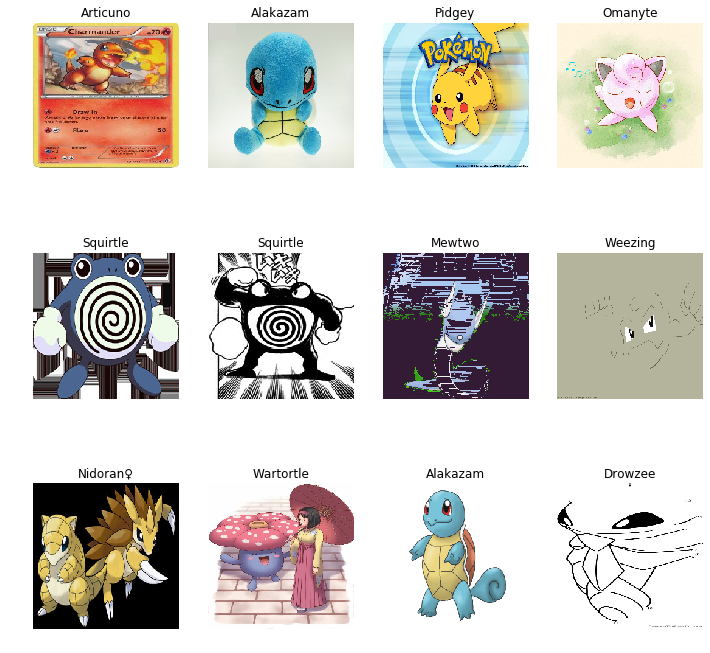

In [0]:
def plt_pokemon(generator):
    cnt = 0
    stp = 0
    for x,y in img_gen_dir:
        print("*"*60)
        print(x.shape)
        print(y.shape)
        print(cnt)
        plot_pokemon(x,y)

        cnt+=1
        if cnt>stp:
            break
plt_pokemon(img_gen_dir)

In [0]:
val_gen = ImageDataGenerator(rescale = 1.0/255)

In [0]:
img_val_dir = val_gen.flow_from_directory("./dataset/val_img/",
                                         target_size = (240,240),
                                         batch_size = 40,
                                         )

Found 2222 images belonging to 151 classes.


************************************************************
(40, 240, 240, 3)
(40, 151)
0


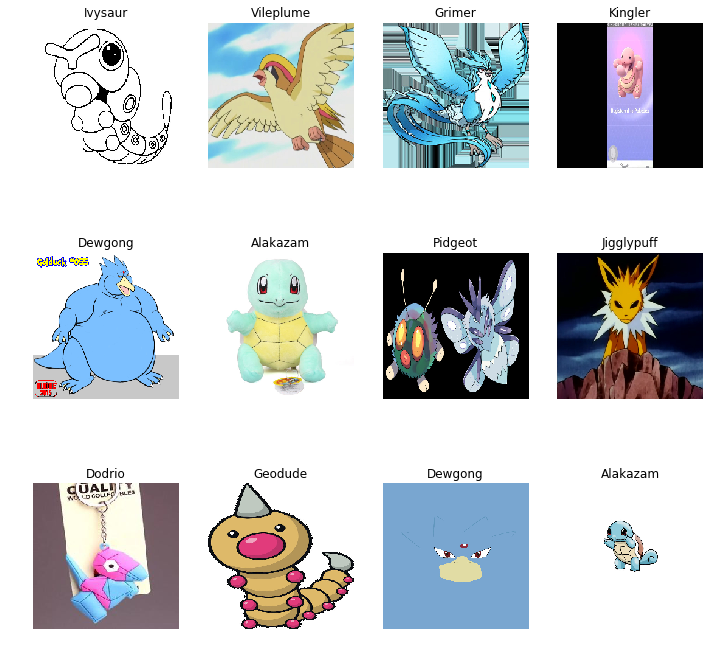

In [0]:
plt_pokemon(img_val_dir)

In [0]:
print(img_gen_dir.samples,img_val_dir.samples)

8435 2222


## Training Our Model -- Resent

In [0]:
from keras.optimizers import adam
adam = adam(lr = 0.0001)

In [0]:
from keras.applications import ResNet50
from keras.layers import *
from keras.models import Model

In [0]:
model = ResNet50(include_top = False ,weights = "imagenet",input_shape = (240,240,3))

W0801 11:51:48.350910 140684714203008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 11:51:48.358114 140684714203008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 11:51:48.379043 140684714203008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0801 11:51:48.434306 140684714203008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0801 11:51:48.435608

94658560/94653016 [==============================] - 2s 0us/step


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
g_avg_pool = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation = "relu")(g_avg_pool)
drp_1 = Dropout(0.4)(fc1)
fc2 = Dense(151 , activation = "softmax")(drp_1)

W0801 11:52:05.637269 140684714203008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
TL_model = Model(input = model.input ,output = fc2)
TL_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
for i in range(len(TL_model.layers)):
    print(i,TL_model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7ff37a36c400>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7ff37a648ac8>
2 <keras.layers.convolutional.Conv2D object at 0x7ff37a322cf8>
3 <keras.layers.normalization.BatchNormalization object at 0x7ff37718bcc0>
4 <keras.layers.core.Activation object at 0x7ff37a3b81d0>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7ff37711bd30>
6 <keras.layers.pooling.MaxPooling2D object at 0x7ff3770f1dd8>
7 <keras.layers.convolutional.Conv2D object at 0x7ff37a34c6d8>
8 <keras.layers.normalization.BatchNormalization object at 0x7ff377058d30>
9 <keras.layers.core.Activation object at 0x7ff377058f28>
10 <keras.layers.convolutional.Conv2D object at 0x7ff376fc5710>
11 <keras.layers.normalization.BatchNormalization object at 0x7ff377024dd8>
12 <keras.layers.core.Activation object at 0x7ff376fdf518>
13 <keras.layers.convolutional.Conv2D object at 0x7ff376f27f28>
14 <keras.layers.convolutional.Conv2D object at 0x7ff376ec2c88>
15 <keras.lay

## Feature Extraction _TransferLearning

In [0]:
for i in range(175):
    TL_model.layers[i].trainable = False
TL_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
TL_model.compile(optimizer=adam,loss = "categorical_crossentropy",metrics=["accuracy"])

W0801 11:52:21.040222 140684714203008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
fea_ext_model = TL_model.fit_generator(img_gen_dir,
                                      steps_per_epoch=img_gen_dir.samples//150,
                                      epochs=2,
                                      validation_data=img_val_dir,
                                      validation_steps=img_val_dir.samples//150)

Epoch 1/2
56/56 [==============================] - 847s 15s/step - loss: 4.8441 - acc: 0.0723 - val_loss: 5.0038 - val_acc: 0.0092
Epoch 2/2
55/56 [============================>.] - ETA: 11s - loss: 4.6946 - acc: 0.1042

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


56/56 [==============================] - 842s 15s/step - loss: 4.6946 - acc: 0.1041 - val_loss: 4.9994 - val_acc: 0.0089


In [0]:
fea_ext_model.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

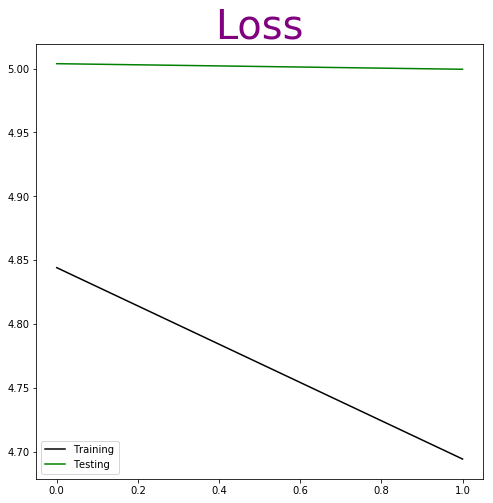

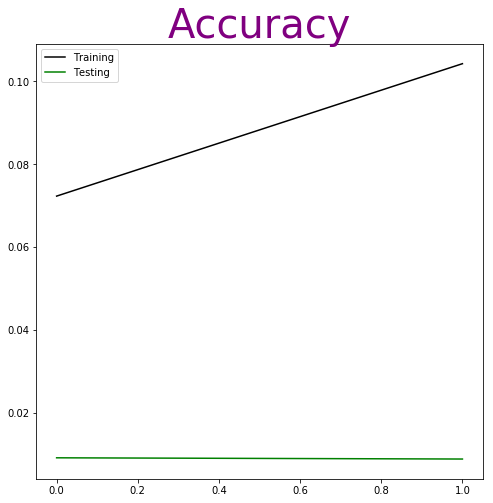

In [0]:
plt.figure(0,figsize=(8,8))
plt.title("Loss",fontsize=40,color="purple")
plt.plot(fea_ext_model.history["loss"],color="black",label="Training")
plt.plot(fea_ext_model.history["val_loss"],color="green",label="Testing")
plt.legend()
plt.show()


plt.figure(1,figsize=(8,8))
plt.title("Accuracy",fontsize=40,color="purple")
plt.plot(fea_ext_model.history["acc"],color="black",label="Training",)
plt.plot(fea_ext_model.history["val_acc"],color="green",label="Testing")
plt.legend()
plt.show()

## Fine Tuning

In [0]:
FT_model = Model(input = model.input ,output = fc2)
FT_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
for i in range(120):
    FT_model.layers[i].trainable = False
FT_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
FT_model.compile(optimizer=adam,loss = "categorical_crossentropy",metrics=["accuracy"])

In [0]:
fine_tune_model = FT_model.fit_generator(img_gen_dir,
                                      steps_per_epoch=img_gen_dir.samples//200,
                                      epochs=2,
                                      validation_data=img_val_dir,
                                      validation_steps=img_val_dir.samples//200)

Epoch 1/2


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


42/42 [==============================] - 658s 16s/step - loss: 4.5155 - acc: 0.1196 - val_loss: 5.0286 - val_acc: 0.0045
Epoch 2/2
42/42 [==============================] - 644s 15s/step - loss: 4.3761 - acc: 0.1369 - val_loss: 5.0121 - val_acc: 0.0095


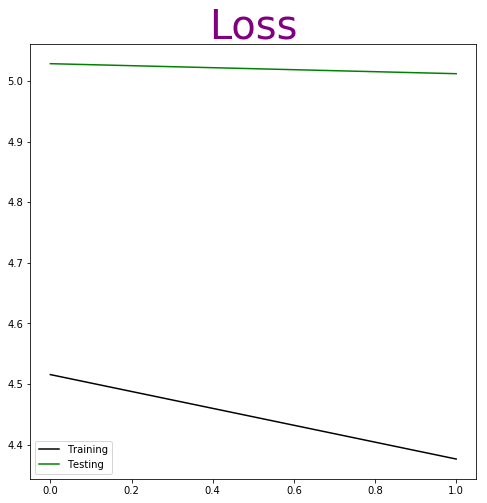

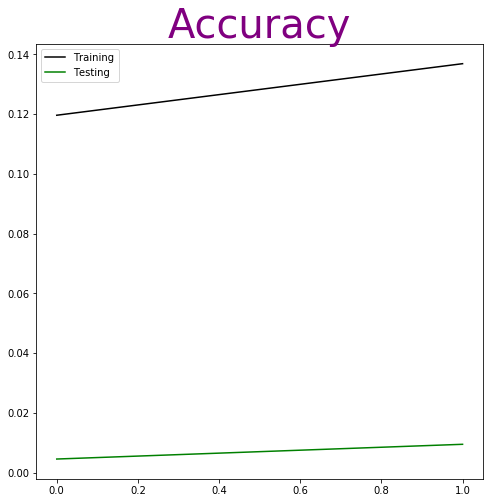

In [0]:
plt.figure(0,figsize=(8,8))
plt.title("Loss",fontsize=40,color="purple")
plt.plot(fine_tune_model.history["loss"],color="black",label="Training")
plt.plot(fine_tune_model.history["val_loss"],color="green",label="Testing")
plt.legend()
plt.show()


plt.figure(1,figsize=(8,8))
plt.title("Accuracy",fontsize=40,color="purple")
plt.plot(fine_tune_model.history["acc"],color="black",label="Training",)
plt.plot(fine_tune_model.history["val_acc"],color="green",label="Testing")
plt.legend()
plt.show()